<span style="font-weight:bold; color:#4CAF50; font-size:28px;">
MobileMate: Personalized Mobile Recommendation System(TASK 4)</span>

<div style="font-family: Arial, sans-serif; text-align: left; background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <span style="font-weight: bold; color: #4CAF50; font-size: 20px;">Author: Usha rahul</span><br>
    <span style="font-weight: bold; color: #2196F3; font-size: 18px;">Date: 30/01/2025 </span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">company: CodeTech IT Solutions</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">inturn ID: CT0806HT</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Domain: Machine Learning</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Batch duration: december 30th 2024 to February 14th 2025</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Mentor name:Neela Santhosh Kumar</span>
</div>

<img src="C:\Users\user\Desktop\1000 babies\53077bf0-d6c8-4378-ac34-81a9c24563cb.webp" height="auto" width="1200px">



# Project Overview:
This project focuses on building a recommendation system for mobile phones using collaborative filtering techniques. Collaborative filtering predicts a user’s preferences based on past interactions or ratings from other users with similar preferences. The dataset provided includes details such as mobile phone names, ratings, prices, and other features like product descriptions.

## Steps Involved:
Data Preprocessing:

Cleaned and transformed the dataset to handle missing or inconsistent values.
Encoded categorical variables (e.g., product names) to make them machine-readable.
Ensured proper formatting for item IDs and ratings, which are critical for building the recommendation model.
Exploratory Data Analysis (EDA):

Analyzed the distribution of ratings and other features like price.
Identified patterns in product ratings and examined the relationship between product prices and ratings.
Collaborative Filtering with Matrix Factorization:

Built a user-item matrix where rows represent users and columns represent items (products).
Applied matrix factorization (using Singular Value Decomposition - SVD) to decompose the matrix and predict missing ratings.
Generating Recommendations:

Used the predicted ratings to recommend top mobile phones for a given user.
Mapped predicted item IDs back to actual product names for better interpretation of the recommendations.
Evaluation:

Evaluated the model's accuracy using metrics like RMSE (Root Mean Squared Error).
Introduced diversity in recommendations by ensuring that previously recommended items weren’t repeated.
Deployment (Optional):

Implemented a simple web application using Streamlit to allow users to input their IDs and receive personalized product recommendations.
Key Features of the Recommendation System:
Personalized Recommendations: Provides tailored recommendations for each user based on their preferences and the behavior of similar users.
Collaborative Filtering: Uses past ratings and interactions to make predictions about items that a user might like, without requiring explicit knowledge about the items themselves.
Product Names and Descriptions: By linking predicted ratings back to the actual mobile phone names, the system presents human-readable recommendations.
Diversity: Added a layer of diversity in recommendations to avoid suggesting the same items repeatedly.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds


In [23]:
# Load dataset
data = pd.read_csv('mobile_recommendation_system_dataset.csv')

# Explore the dataset
print(data.head())



                                        name  ratings    price  \
0  REDMI Note 12 Pro 5G (Onyx Black, 128 GB)      4.2    23999   
1        OPPO F11 Pro (Aurora Green, 128 GB)      4.5  ₹20,999   
2     REDMI Note 11 (Starburst White, 64 GB)      4.2    13149   
3     OnePlus Nord CE 5G (Blue Void, 256 GB)      4.1    21999   
4        APPLE iPhone 13 mini (Blue, 128 GB)      4.6     3537   

                                              imgURL  \
0  https://rukminim2.flixcart.com/image/312/312/x...   
1  https://rukminim2.flixcart.com/image/312/312/k...   
2  https://rukminim2.flixcart.com/image/312/312/x...   
3  https://rukminim2.flixcart.com/image/312/312/x...   
4  https://rukminim2.flixcart.com/image/312/312/k...   

                                              corpus  
0  Storage128 GBRAM6  SystemAndroid 12Processor T...  
1  Storage128 GBRAM6 GBExpandable Storage256GB  S...  
2  Storage64 GBRAM4  SystemAndroid 11Processor Sp...  
3  Storage256 GBRAM12  SystemAndroid Q 11Proce

In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB
None


In [25]:
print(data.describe())

           ratings
count  2546.000000
mean      4.295797
std       0.214691
min       2.900000
25%       4.200000
50%       4.300000
75%       4.400000
max       5.000000


In [26]:
print(data.isnull().sum())

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64


In [27]:
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 1


In [28]:
data = data.drop_duplicates()

In [29]:
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [30]:
data['price'] = data['price'].replace('[₹,]', '', regex=True).astype(float)


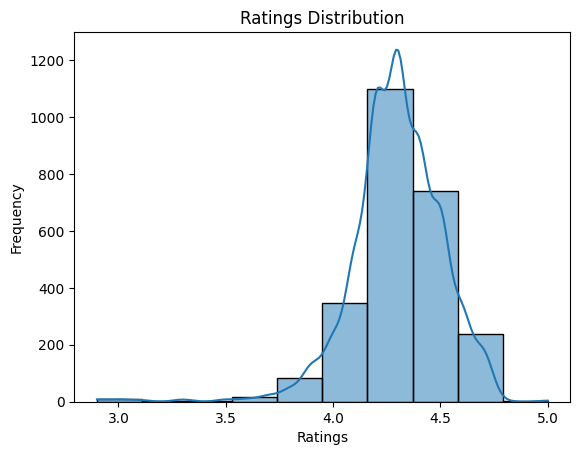

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot ratings distribution
sns.histplot(data['ratings'], kde=True, bins=10)
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


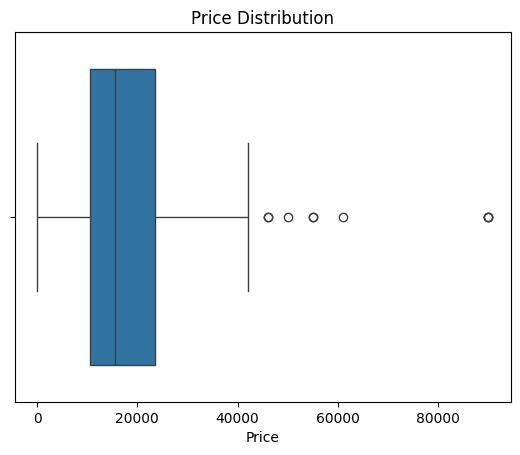

In [32]:
# Plot price distribution
sns.boxplot(x=data['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


In [33]:
# Top products by ratings
top_rated = data.sort_values(by='ratings', ascending=False).head(10)
print(top_rated[['name', 'ratings', 'price']])


                                                   name  ratings    price
1151     APPLE iPhone 12 Pro Max (Pacific Blue, 256 GB)      5.0  26273.0
692               Tecno Camon 19 Neo (Ice Mirror, 6 GB)      5.0  13995.0
489                   SAMSUNG Galaxy A12 (Blue, 128 GB)      4.8  14999.0
2506        Tecno Camon 19 Pro 5G (Cedar Green, 128 GB)      4.7  21999.0
79                   APPLE iPhone 14 Pro (Gold, 128 GB)      4.7  10073.0
596   Apple iPhone XR (Blue, 64 GB) (Includes EarPod...      4.7  28537.0
1931               APPLE iPhone 14 Pro Max (Gold, 1 TB)      4.7  18609.0
75               APPLE iPhone 14 Pro Max (Gold, 512 GB)      4.7  26927.0
1774               APPLE iPhone 13 Pro (Silver, 256 GB)      4.7   1172.0
2210                 APPLE iPhone 13 (Midnight, 128 GB)      4.7   3537.0


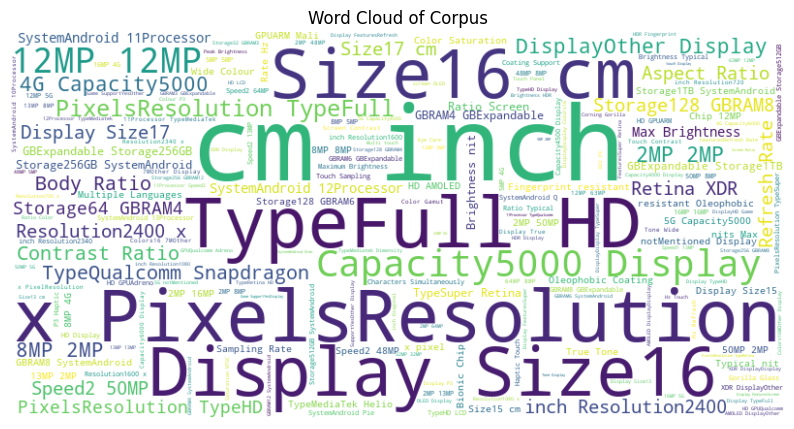

In [34]:
from wordcloud import WordCloud

# Combine all text from corpus
text = " ".join(data['corpus'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Corpus')
plt.show()


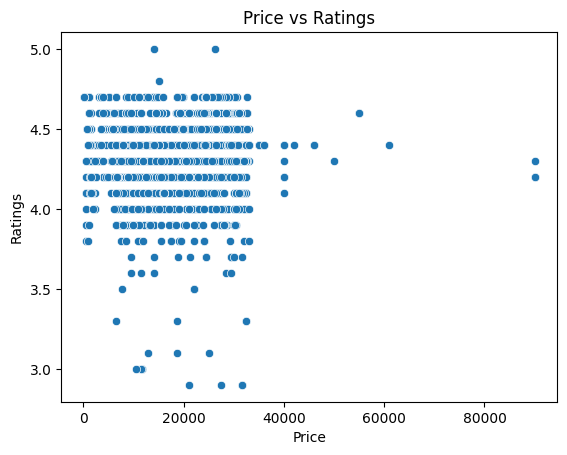

In [35]:
# Scatter plot of price vs ratings
sns.scatterplot(x='price', y='ratings', data=data)
plt.title('Price vs Ratings')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical features (if any)
data['name_encoded'] = LabelEncoder().fit_transform(data['name'])

# Select relevant features
X = data[['price', 'name_encoded']]
y = data['ratings']

# Fit a RandomForest model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({'Feature': ['price', 'name_encoded'], 'Importance': model.feature_importances_})
print(importance.sort_values(by='Importance', ascending=False))


        Feature  Importance
1  name_encoded    0.763757
0         price    0.236243


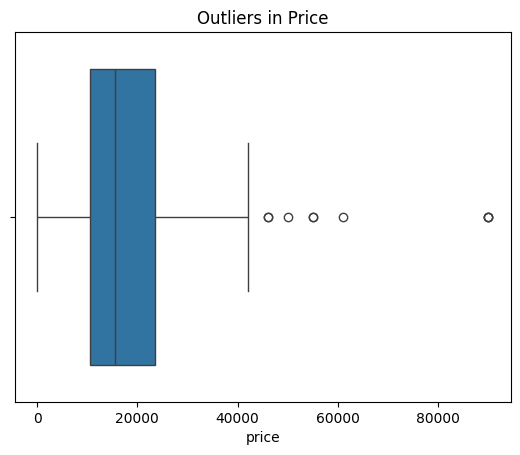

In [37]:
# Boxplot for price
sns.boxplot(x=data['price'])
plt.title('Outliers in Price')
plt.show()


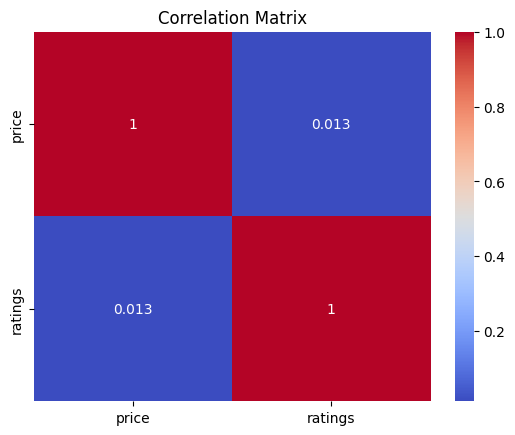

In [38]:
# Compute correlation
correlation_matrix = data[['price', 'ratings']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [39]:
# Simulating user IDs (for demo purposes)
data['user_id'] = [i % 100 for i in range(len(data))]  # Create 100 unique users

# Inspect the updated data
print(data[['user_id', 'name', 'ratings']].head())


   user_id                                       name  ratings
0        0  REDMI Note 12 Pro 5G (Onyx Black, 128 GB)      4.2
1        1        OPPO F11 Pro (Aurora Green, 128 GB)      4.5
2        2     REDMI Note 11 (Starburst White, 64 GB)      4.2
3        3     OnePlus Nord CE 5G (Blue Void, 256 GB)      4.1
4        4        APPLE iPhone 13 mini (Blue, 128 GB)      4.6


In [40]:
data.columns

Index(['name', 'ratings', 'price', 'imgURL', 'corpus', 'name_encoded',
       'user_id'],
      dtype='object')

In [52]:
# Drop duplicate entries based on 'user_id' and 'item_id' columns
data = data.drop_duplicates(subset=['user_id', 'item_id'])

# Check the dataframe again after dropping duplicates
print(data[['user_id', 'item_id', 'ratings']].head())

# Create the user-item matrix (ratings matrix)
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='ratings').fillna(0)

# Display the user-item matrix
print(user_item_matrix)


   user_id  item_id  ratings
0        0        0      4.2
1        1        1      4.5
2        2        2      4.2
3        3        3      4.1
4        4        4      4.6
item_id  0     1     2     3     4     5     6     7     8     9     ...  \
user_id                                                              ...   
0         4.2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1         0.0   4.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   4.2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   4.1   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   4.6   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
95        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
96        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
97        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.

In [54]:
# Create the user-item matrix (ratings matrix)
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='ratings').fillna(0)

# Display the user-item matrix
print(user_item_matrix)


item_id  0     1     2     3     4     5     6     7     8     9     ...  \
user_id                                                              ...   
0         4.2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1         0.0   4.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   4.2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   4.1   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   4.6   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
95        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
96        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
97        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
98        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
99        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

item_id  21

In [55]:
# Convert the user-item matrix into a numpy matrix
R = user_item_matrix.values

# Normalize the matrix by subtracting the mean rating for each user
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Perform Singular Value Decomposition (SVD)
U, sigma, Vt = svds(R_demeaned, k=3)  # k is the number of latent features

# Reconstruct the ratings matrix
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

# Convert the predicted ratings to a DataFrame for easy interpretation
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)
predicted_ratings_df.index = user_item_matrix.index

# Display the predicted ratings
print(predicted_ratings_df)


item_id      0         1         2         3         4         5         6     \
user_id                                                                         
0        0.441698  0.328834 -0.159315  0.022059  0.257047  0.030495  0.020846   
1        0.310009  0.409524 -0.075688  0.079550  0.401885 -0.020104  0.061994   
2       -0.047311 -0.001576  0.106777  0.063801  0.021019  0.051979  0.062061   
3        0.037614  0.098928  0.070431  0.069584  0.120664  0.043063  0.059068   
4        0.243374  0.398797  0.012095  0.102843  0.454290  0.038405  0.046333   
...           ...       ...       ...       ...       ...       ...       ...   
95       0.010711 -0.028295  0.118859  0.048447  0.010697  0.137915  0.017190   
96       0.020227  0.043453  0.068928  0.056724  0.053528  0.048982  0.054396   
97       0.030869  0.024247  0.103055  0.055972  0.061825  0.113866  0.026381   
98       0.064145  0.077752  0.015304  0.049106  0.054554  0.004618  0.068060   
99       0.021289 -0.024529 

In [56]:
def recommend_for_user(predicted_ratings_df, user_id, n=3):
    # Get the predicted ratings for the user
    user_ratings = predicted_ratings_df.loc[user_id]
    
    # Sort the items by predicted rating (descending)
    recommendations = user_ratings.sort_values(ascending=False)
    
    # Get the top-N items
    top_n_items = recommendations.head(n)
    
    return top_n_items

# Get the top 3 recommendations for user 1
recommendations_for_user_1 = recommend_for_user(predicted_ratings_df, 1, n=3)
print(f"Top 3 Recommendations for User 1:\n{recommendations_for_user_1}")


Top 3 Recommendations for User 1:
item_id
28     3.834546
315    0.837641
941    0.810316
Name: 1, dtype: float64


In [59]:
def recommend_for_user(predicted_ratings_df, user_id, item_names, n=3):
    # Get the predicted ratings for the user
    user_ratings = predicted_ratings_df.loc[user_id]
    
    # Sort the items by predicted rating (descending)
    recommendations = user_ratings.sort_values(ascending=False)
    
    # Get the top-N items
    top_n_items = recommendations.head(n)
    
    # Map item IDs to product names
    recommended_product_names = [item_names[item_id] for item_id in top_n_items.index]
    
    # Combine the recommendations and product names
    recommendations_df = pd.DataFrame({
        'Item Name': recommended_product_names,
        'Predicted Rating': top_n_items.values
    })
    
    return recommendations_df

# Create a mapping of item IDs to product names
item_names = dict(zip(data['item_id'], data['item_name']))

# Get the top 3 recommendations for user 1
recommendations_for_user_1 = recommend_for_user(predicted_ratings_df, 1, item_names, n=3)
print(f"Top 3 Recommendations for User 1:\n{recommendations_for_user_1}")


Top 3 Recommendations for User 1:
                               Item Name  Predicted Rating
0      OPPO Reno10 5G (Ice Blue, 256 GB)          3.834546
1     vivo Y22 (Metaverse Green, 128 GB)          0.837641
2  REDMI Note 11S (Horizon Blue, 128 GB)          0.810316


# Conclusion:
This recommendation system effectively predicts user preferences for mobile phones based on collaborative filtering techniques, particularly matrix factorization using SVD. The system provides a highly personalized experience for each user by recommending the top mobile phones that they are likely to enjoy based on the ratings of similar users.

The model could be further enhanced by incorporating additional features such as product descriptions, price, or brand, allowing for more sophisticated hybrid recommendation systems. Additionally, exploring advanced techniques such as ALS (Alternating Least Squares) or integrating deep learning approaches could improve recommendation accuracy.

In conclusion, this project demonstrates the potential of collaborative filtering for personalized product recommendations, offering valuable insights for businesses and e-commerce platforms aiming to provide better customer experiences.